# Quantum Random Number Generator 

In this tutorial we will learn how to make a quantum random number generator!

Traditionally, we can think of a coin toss as generating a 0 or 1, heads or tails randomly. In order to simulate a classical random toss, we can execute the following code on Python

In [1]:
import random
for n in range(5):
    if random.random()<0.5:       #if the random number is less than 0.5 print heads
        print('HEADS')
    else:
        print('TAILS')

HEADS
HEADS
HEADS
TAILS
HEADS


Does the random function return a random number all the time? No. In fact in classical computing it is very hard to randomly generate numbers. The random() function is a pseudorandom number generator. It produces an output by taking a definite input and processing it in a deterministic way. 

It is important to generate random numbers that are actually random, otherwise cryptography ciphers can be cracked if the key is created using poorly generated random numbers. To solve the problem of pseudo-randomness, let us use the concept of measurements of quantum superpositions. One defining property of quantum mechanics is that we do not know the state of the qubit until we measure or observe it. The result is completely undefined before the moment of measurement. This means we can use quantum computers for the ultimate coin flip.

### Quantum coin flip

### Step 1: Initialize a single random qubit

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

To generate an equal superposition of a qubit |Ψ⟩ of |0⟩ and |1⟩, apply the hadamard gate

In [3]:
circuit.h(q)

To extract the output, use the measure() function in Qiskit

In [4]:
circuit.measure(q,c)

### Step 2: Run the circuit on a quantum simulator

We will run the circuit 5 times to get 5 results

In [5]:
from qiskit import BasicAer, execute

backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=5, memory=True)

Extract the results from job.result() using get_memory()

In [6]:
result = job.result().get_memory()
print(result)
for output in result:
    if output=='0':
        print('HEADS')
    else:
        print('TAILS')

['0', '1', '0', '1', '0']
HEADS
TAILS
HEADS
TAILS
HEADS


### Step 3: Run the circuit on a backend IBM device

In [9]:
from qiskit import IBMQ

provider=IBMQ.load_account()

backend = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend, shots=5, memory=True)
for output in job.result().get_memory():
    if output=='0':
        print('HEADS\n')
    else:
        print('TAILS\n')

ibmqfactory.load_account:WARNING:2021-01-29 13:47:13,110: Credentials are already in use. The existing account in the session will be replaced.


TAILS

HEADS

TAILS

TAILS

TAILS



Now we get heads, tails, tails, heads, tails

### More general random number generation

Sometimes we need to generate numbers within a certain range, rather than just 0 or 1 or a coin flip. We will need to set up  probability distributions for which each outcome.

This task is perfect for quantum computers as they will be able to efficiently sample from probability distributions that would be infeasible to perform using a classical computer

To represent numbers larger than 0 and 1, we need more qubits. n qubits can represent a binary string of numbers from 0 to 2^(n-1). If we want to generate random numbers between 0 and 7, we will need to choose n=3.

For a uniform probability distribution over all numbers, we will apply a Hadamard on each.

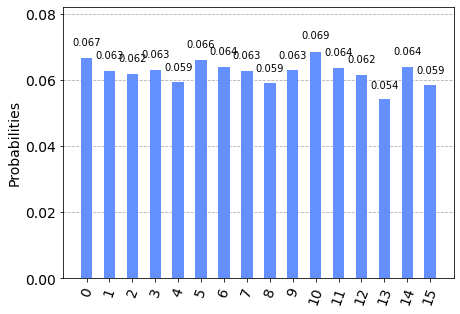

In [10]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
circuit = QuantumCircuit(q, c)

for j in range(n):
    circuit.h(q[j])
    
circuit.measure(q,c)

job = execute(circuit, BasicAer.get_backend('qasm_simulator'), shots=8192)

# get the histogram of bit string results, convert it to one of integers and plot it
bit_counts = job.result().get_counts()
int_counts = {}
for bitstring in bit_counts:
    int_counts[ int(bitstring,2) ] = bit_counts[bitstring]

from qiskit.tools.visualization import plot_histogram    
plot_histogram(int_counts)

Here, we can see all 16 numbers from 0 to 15 are printed with almost equal probability, indicating that our quantum number generator is random